In [1]:
import pandas as pd
import math 
import numpy as np
from sklearn import preprocessing, model_selection, svm 
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [16]:
df = pd.read_csv('GOOGL.csv',
                  header=0, 
                  index_col='Date',
                  parse_dates=True)
df = df[['Open','High','Low','Close','Volume',]]
df['HL_PCT'] = (df['High']-df['Close'])/df['Close'] * 100
df['PCT_change'] = (df['Close']-df['Open'])/df['Open'] * 100
df = df[['Close','HL_PCT','PCT_change','Volume']]
forecast_col = 'Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.1*len(df)))#0.01
df['label'] = df[forecast_col].shift(-forecast_out)

In [17]:
df.head()

,Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2009-05-22,196.946945,1.308767,-0.796656,3433700,264.859863
2009-05-26,202.382385,0.158271,3.166221,6202700,266.266266
2009-05-27,202.982986,1.553408,-0.019722,6062500,263.113098
2009-05-28,205.405411,0.297271,0.420872,5332200,265.565552
2009-05-29,208.823822,0.000000,1.242386,5291100,253.438446


In [18]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [19]:
import pickle

In [20]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [21]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [22]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1120.20365394 1141.10602467 1152.22897977 1160.22340357 1157.59491847
 1162.78503937 1158.26740318 1174.01574078 1184.72646402 1186.9331777
 1182.95723203 1197.31655283 1200.91135043 1204.8644441  1207.49696793
 1209.08934432 1210.30936267 1196.39426539 1200.4863666  1180.28673603
 1180.99804421 1183.64972309 1182.12024727 1218.61050882 1229.52909199
 1233.49937519 1241.05751547 1245.45546373 1252.83119852 1248.35979438
 1256.69207361 1263.22180303 1249.61151702 1248.77723442 1245.46266428
 1244.9244201  1239.78348597 1251.52495335 1239.77027964 1238.27199408
 1253.89956022 1258.88847363 1263.68671335 1276.23006729 1269.4652849
 1236.16837867 1234.65745985 1223.41817944 1209.36395089 1214.60403027
 1230.94514547 1245.63478582 1252.91261831 1257.10492663 1251.50212332
 1255.72531662 1261.83753534 1271.06694772 1293.44197783 1289.79096318
 1282.59452064 1279.63796321 1278.41669652 1274.9960219  1268.09472241
 1263.60230453 1259.16044092 1277.40497387 1299.50166828 1308.40309414
 1323.40

In [23]:
style.use('ggplot')

In [24]:
df['Forecast'] = np.nan

In [25]:
last_date = df.iloc[-1].name

In [26]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [27]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [28]:
df.tail()

,Close,HL_PCT,PCT_change,Volume,label,Forecast
Date,,,,,,
2018-05-13 08:00:00,NaN,NaN,NaN,NaN,NaN,1455.943648
2018-05-14 08:00:00,NaN,NaN,NaN,NaN,NaN,1473.019329
2018-05-15 08:00:00,NaN,NaN,NaN,NaN,NaN,1494.975371
2018-05-16 08:00:00,NaN,NaN,NaN,NaN,NaN,1485.851624
2018-05-17 08:00:00,NaN,NaN,NaN,NaN,NaN,1503.414485


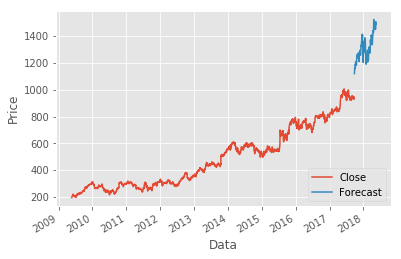

In [29]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()